In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('usp_drug_classification (1).csv')
df


,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,NaN,celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac diethylamine,D07817,NaN
...,...,...,...,...,...,...,...
1798,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,sodium lactate,D02183,(JAN/USP)
1799,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,sodium ferric gluconate complex,D05859,(USAN)
1800,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,"sodium phosphate, monobasic",D04400,(USP)
1801,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,"sodium phosphate, dibasic",D05869,(USP)


In [ ]:
df.describe()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
count,1803,1803,1803,1343,1803,1803,1673
unique,33,146,804,432,1497,1525,31
top,Antibacterials,Nonsteroidal Anti-inflammatory Drugs,dexamethasone,DG00011,divalproex sodium,D00304,(INN)
freq,196,92,34,34,6,6,231


In [ ]:
df.dtypes



usp_category            object
usp_class               object
usp_drug                object
kegg_id_drug            object
drug_example            object
kegg_id_drug_example    object
nomenclature            object
dtype: object

In [ ]:
df.shape


(1803, 7)

In [ ]:
df.isna().sum()

usp_category              0
usp_class                 0
usp_drug                  0
kegg_id_drug            460
drug_example              0
kegg_id_drug_example      0
nomenclature            130
dtype: int64

In [ ]:
df.dropna(axis = 0 , how = 'any',inplace=True)

In [ ]:
df.columns

Index(['usp_category', 'usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example',
       'kegg_id_drug_example', 'nomenclature'],
      dtype='object')

In [ ]:
df['usp_category'].unique()

array(['Analgesics', 'Anesthetics',
       'Anti-Addiction/Substance Abuse Treatment Agents',
       'Antibacterials', 'Anticonvulsants', 'Antidementia Agents',
       'Antidepressants', 'Antiemetics', 'Anti-inflammatory Agents',
       'Antimigraine Agents', 'Antimyasthenic Agents',
       'Antimycobacterials', 'Antineoplastics', 'Antiparasitics',
       'Antiparkinson Agents', 'Antipsychotics', 'Antivirals',
       'Anxiolytics', 'Bipolar Agents', 'Blood Glucose Regulators',
       'Blood Products/Modifiers/Volume Expanders',
       'Cardiovascular Agents', 'Central Nervous System Agents',
       'Gastrointestinal Agents', 'Genitourinary Agents',
       'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)',
       'Immunological Agents', 'Inflammatory Bowel Disease Agents',
       'Ophthalmic Agents', 'Respiratory Tract/Pulmonary Agents',
       'Sleep Disorder Agents',
       'Therapeutic Nutrients/Minerals/Electrolytes'], dtype=object)

In [ ]:
df.shape

(1238, 7)

In [ ]:
df.isna().sum()

usp_category            0
usp_class               0
usp_drug                0
kegg_id_drug            0
drug_example            0
kegg_id_drug_example    0
nomenclature            0
dtype: int64

In [ ]:
df.columns

Index(['usp_category', 'usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example',
       'kegg_id_drug_example', 'nomenclature'],
      dtype='object')

In [ ]:
df.shape


(1238, 7)

In [ ]:
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le=LabelEncoder()
scaler=MinMaxScaler()

categ=['usp_category','usp_class', 'usp_drug', 'drug_example', 'kegg_id_drug',
       'kegg_id_drug_example','nomenclature']
df[categ] = df[categ].apply(le.fit_transform)

print(df[categ])

      usp_category  usp_class  usp_drug  drug_example  kegg_id_drug  \
1                0         90       116           261           139   
2                0         90       116           262           139   
3                0         90       116           263           139   
9                0         90       159           374           272   
10               0         90       159           375           272   
...            ...        ...       ...           ...           ...   
1734            30         71       432           997           326   
1735            30         71       432           998           326   
1737            30        115       130           297           334   
1738            30        115       130           298           334   
1744            31         65       307           709           275   

      kegg_id_drug_example  nomenclature  
1                      795            17  
2                      277            16  
3                 

In [ ]:
df

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
1,0,90,116,139,261,795,17
2,0,90,116,139,262,277,16
3,0,90,116,139,263,278,13
9,0,90,159,272,374,498,17
10,0,90,159,272,375,305,7
...,...,...,...,...,...,...,...
1734,30,71,432,326,997,950,1
1735,30,71,432,326,998,201,11
1737,30,115,130,334,297,803,1
1738,30,115,130,334,298,235,20


In [ ]:
df.describe()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,15.214055,60.200323,217.713247,207.498384,501.920840,502.779483,10.701939
std,9.513819,35.367116,123.277943,126.719212,288.195566,296.874452,6.947023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,29.000000,114.000000,98.250000,256.000000,243.250000,3.000000
50%,16.000000,57.500000,210.500000,209.000000,496.000000,497.500000,13.000000
75%,23.000000,92.000000,327.000000,316.000000,756.750000,759.750000,16.000000
max,31.000000,123.000000,432.000000,431.000000,998.000000,1023.000000,22.000000


In [ ]:
df.shape

(1238, 7)

In [ ]:
df.dtypes

usp_category            int64
usp_class               int64
usp_drug                int64
kegg_id_drug            int64
drug_example            int64
kegg_id_drug_example    int64
nomenclature            int64
dtype: object

## **Importing new data set with labelencoding**

In [ ]:
df.to_csv('new_dataset1.csv', index=False)

In [ ]:
dfnew=pd.read_csv("new_dataset1.csv")
dfnew.head()


,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,0,90,116,139,261,795,17
1,0,90,116,139,262,277,16
2,0,90,116,139,263,278,13
3,0,90,159,272,374,498,17
4,0,90,159,272,375,305,7


In [ ]:
corr = dfnew.corr(method = 'pearson')
corr

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
usp_category,1.000000,-0.118034,-0.005977,-0.188535,0.002628,-0.003993,-0.095063
usp_class,-0.118034,1.000000,0.052905,0.136224,0.044681,0.024129,0.042457
usp_drug,-0.005977,0.052905,1.000000,0.028211,0.983349,0.033507,-0.009099
kegg_id_drug,-0.188535,0.136224,0.028211,1.000000,0.018037,0.130333,-0.076965
drug_example,0.002628,0.044681,0.983349,0.018037,1.000000,0.038857,-0.009084
kegg_id_drug_example,-0.003993,0.024129,0.033507,0.130333,0.038857,1.000000,-0.380890
nomenclature,-0.095063,0.042457,-0.009099,-0.076965,-0.009084,-0.380890,1.000000


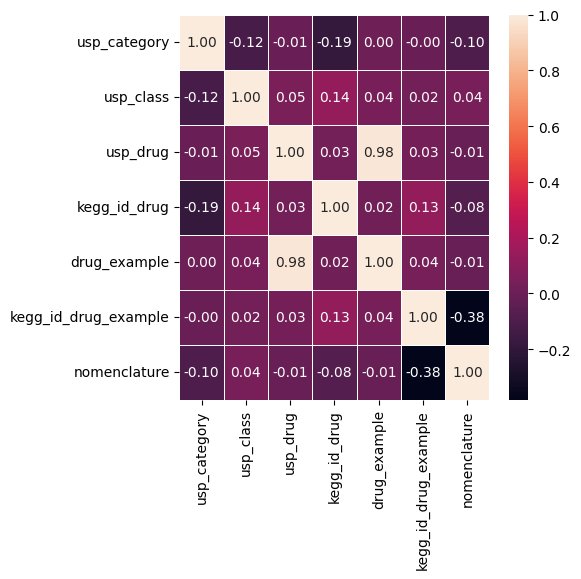

In [ ]:
plt.figure(figsize=(5,5), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()



In [ ]:
corr['usp_category'].sort_values(ascending = False)

usp_category            1.000000
drug_example            0.002628
kegg_id_drug_example   -0.003993
usp_drug               -0.005977
nomenclature           -0.095063
usp_class              -0.118034
kegg_id_drug           -0.188535
Name: usp_category, dtype: float64

## **Classification and test train split**

In [ ]:
#Identifing target variable
y = dfnew[['usp_category']]
X = dfnew.drop (columns = ['usp_category','nomenclature'])

**GRADIENT BOOSTING CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier object
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,"%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 88.70967741935483 %


## **SMOTE**

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score


In [ ]:

# # generate imbalanced classification data

# X, y = make_classification(n_classes=31, class_sep=0.5,
#                            weights=[0.05]*5 + [0.01]*26, n_informative=5,
#                            n_redundant=1, flip_y=0, n_features=6,
#                            n_clusters_per_class=1, n_samples=1238,
#                            random_state=42)

# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# # perform SMOTE on the training data
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # train a logistic regression model on the resampled data
# logreg = LogisticRegression()
# logreg.fit(X_resampled, y_resampled)

# # evaluate the model on the test data
# y_pred = logreg.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.2f}%".format(acc * 100))

SGDC is more suitable for multi classification.






<br>

It is an online learning algorithm , meanining that it updates after each individual record.

In [ ]:
# from sklearn.model_selection import train_test_split
# X, y = make_classification()
# from sklearn.linear_model import SGDClassifier


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=40) #30% testing and 70% training , random state is 40 ,

# # Create an instance of SGDClassifier and set the maximum number of iterations to 1000
# clf = SGDClassifier(max_iter=1000)

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Evaluate the classifier on the testing data
# accuracy = clf.score(X_test, y_test)

# print("Accuracy:", (accuracy*100),"%")
